In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


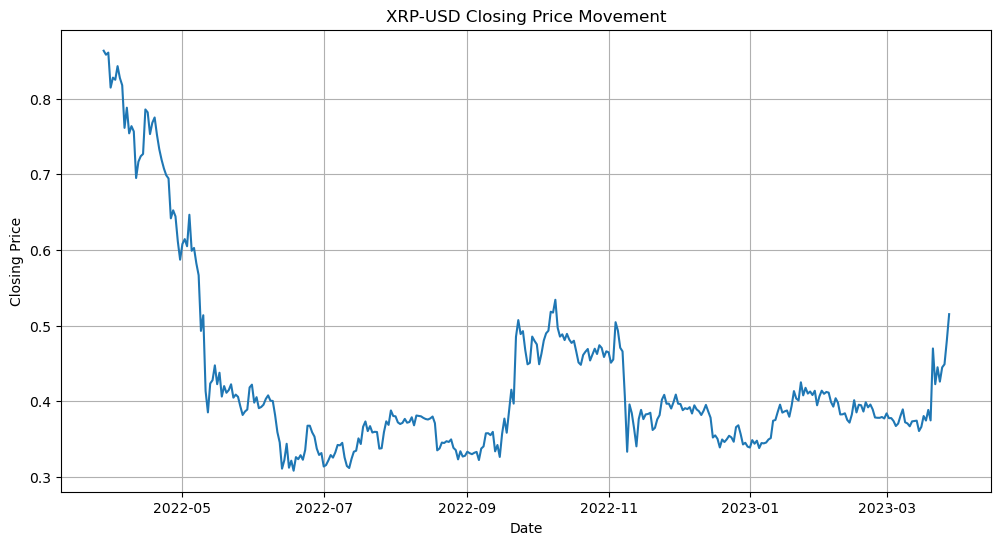

In [4]:
data = yf.download('XRP-USD', start="2022-3-28", end="2023-3-29")

plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('XRP-USD Closing Price Movement')
plt.grid()
plt.show()

In [5]:
log_return =np.log(data['Adj Close']/data['Adj Close'].shift(1))

In [6]:
vol = np.sqrt(365)* log_return [-183:-1].std()
print('The annualised volatility is', round(vol*100,2),'%')

The annualised volatility is 78.01 %


In [7]:
#S: spot price = 0.500754
#K: strike price = 0.550
#T: time to maturity = 3 month = 1/4
#r: risk free rate = 3 month treasury bill US = 0.04638 =4.638%
#vol: volatility of underlying asset = 0.7801
#payoff: call 


In [8]:
 def euro_option_bs (S, K, T, r, vol, payoff):
     d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
     d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
     if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
     return option_value

In [9]:
euro_option_bs (0.500754, 0.550, 0.25, 0.04638, 0.7801, 'call' )

0.061057337208844625

In [10]:
S = np.linspace(0,1,21)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 0.550, 0.25, 0.04638, 0.7801, 'call')

C:\Users\carlo\AppData\Local\Temp\ipykernel_23164\1980275431.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\carlo\AppData\Local\Temp\ipykernel_23164\1980275431.py:3: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


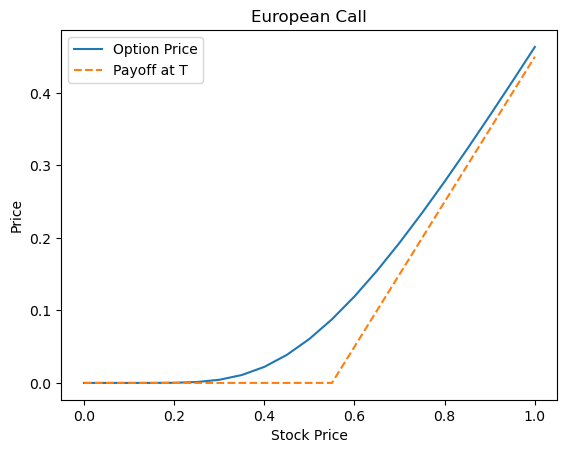

In [11]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-0.550,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [12]:
# we have done Blach Scholes model now we are going to do the MonteCarlo Simulation


In [22]:
import numpy as np
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [23]:
T = 0.25
r = 0.04638
sigma = 0.7801
S0 = 0.500754
K = 0.550

In [24]:
S = mcs_simulation_np(10000)

In [25]:
S = np.transpose(S)
S

array([[0.500754  , 0.49825108, 0.49520769, ..., 0.37654177, 0.37442069,
        0.37135164],
       [0.500754  , 0.50071409, 0.50177079, ..., 0.83748386, 0.8399574 ,
        0.84028735],
       [0.500754  , 0.50042975, 0.5000081 , ..., 0.61824345, 0.62227942,
        0.61982294],
       ...,
       [0.500754  , 0.49752695, 0.49900922, ..., 0.17252639, 0.17077166,
        0.17155745],
       [0.500754  , 0.49936605, 0.50010493, ..., 0.42163832, 0.4201641 ,
        0.42318438],
       [0.500754  , 0.50093181, 0.50150403, ..., 0.50551443, 0.50703208,
        0.50451496]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

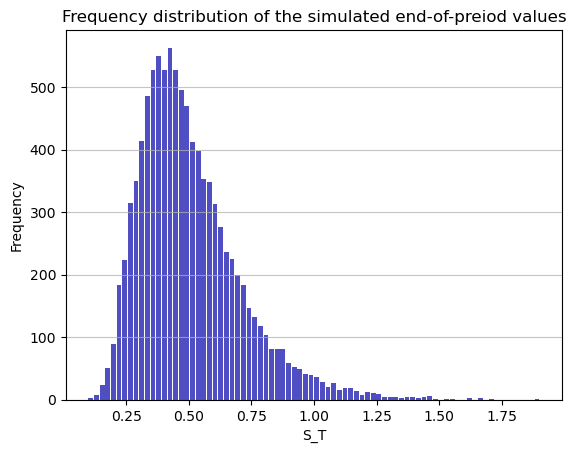

In [26]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [27]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call $', str(c))

European call $ 0.060173159173878776


In [19]:
# Greeks

In [28]:
#S: spot price = 0.500754
#K: strike price = 0.550
#T: time to maturity = 3 month = 1/4
#r: risk free rate = 3 month treasury bill US = 0.04638 =4.638%
#q: continuous divident yeld = 0 cryptocurrency do not pay dividend
#vol: volatility of underlying asset = 0.7801
#payoff: call 

def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        
    return delta

In [29]:
delta(0.500754, 0.550, 0.25, 0.04638, 0, 0.7801,"call")

0.4937214933151761

In [30]:
S = np.linspace(0,1,21)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 0.550, 0.25, 0.04638, 0, 0.7801,"call")

C:\Users\carlo\AppData\Local\Temp\ipykernel_23164\1234282112.py:11: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


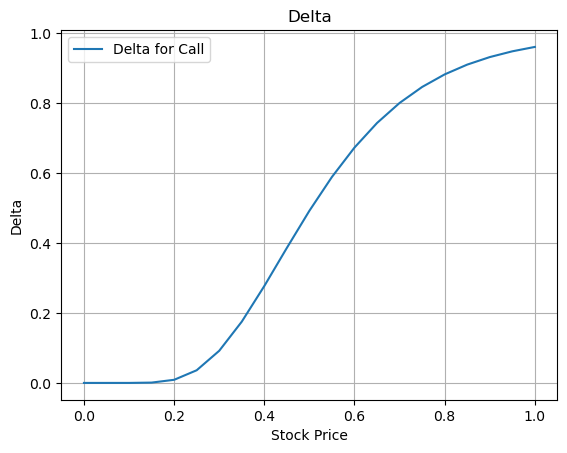

In [31]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [32]:
# Gamma ; Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.


In [33]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [34]:
gamma(0.500754, 0.550, 0.25, 0.04638, 0, 0.7801,"call")

2.0422625277250956

In [35]:
S = np.linspace(0,2,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],  0.550, 0.25, 0.04638, 0, 0.7801,"call")

C:\Users\carlo\AppData\Local\Temp\ipykernel_23164\716081051.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\carlo\AppData\Local\Temp\ipykernel_23164\716081051.py:4: RuntimeWarning: invalid value encountered in double_scalars
  gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))


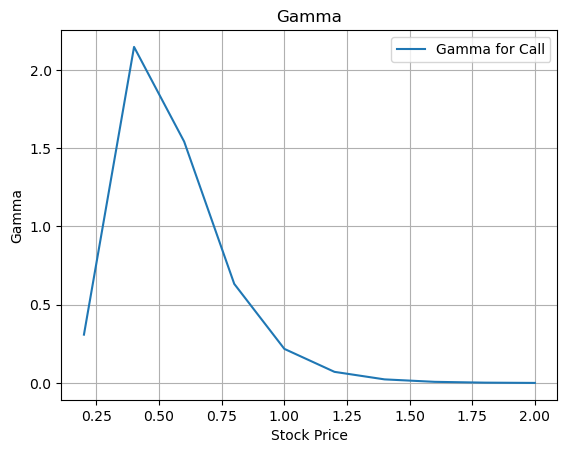

In [36]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [37]:
# Speed: Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [38]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [39]:
speed(0.500754, 0.550, 0.25, 0.04638, 0, 0.7801,"call")

-1.9569061438369166

In [40]:
S = np.linspace(0,2,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 0.550, 0.25, 0.04638, 0, 0.7801,"call")

C:\Users\carlo\AppData\Local\Temp\ipykernel_23164\3198024367.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\carlo\AppData\Local\Temp\ipykernel_23164\3198024367.py:4: RuntimeWarning: invalid value encountered in double_scalars
  speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))


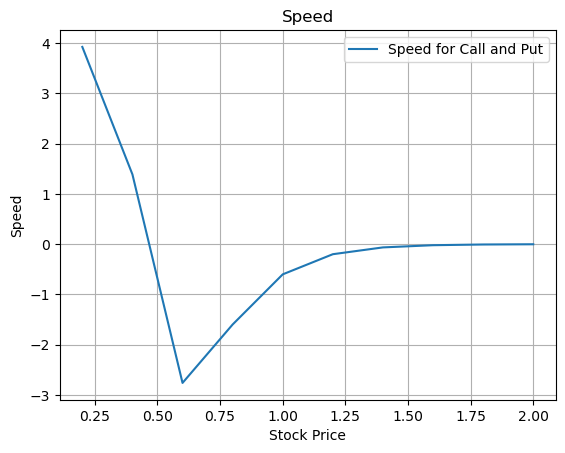

In [41]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [42]:
#Rho: measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [43]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return rho

In [44]:
rho(0.500754, 0.550, 0.25, 0.04638, 0, 0.7801,"call")

0.04654391886367577

In [45]:
r = np.linspace(0,1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(0.500754, 0.550, 0.25, r[i], 0, 0.7801,"call")
    

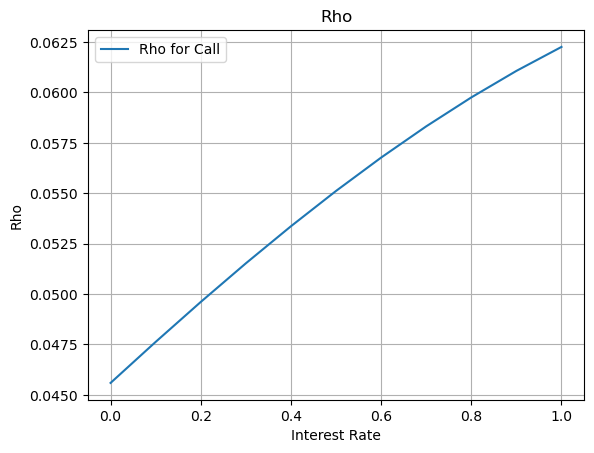

In [46]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

In [47]:
# Theta:represents the responsiveness of the option's value to the passing of time

In [48]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)

    return theta

In [49]:
theta(0.500754, 0.550, 0.25, 0.04638, 0, 0.7801,"call")

0.16445762035588166

In [50]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(0.500754, 0.550, T[i],  0.04638, 0, 0.7801,"call")
    

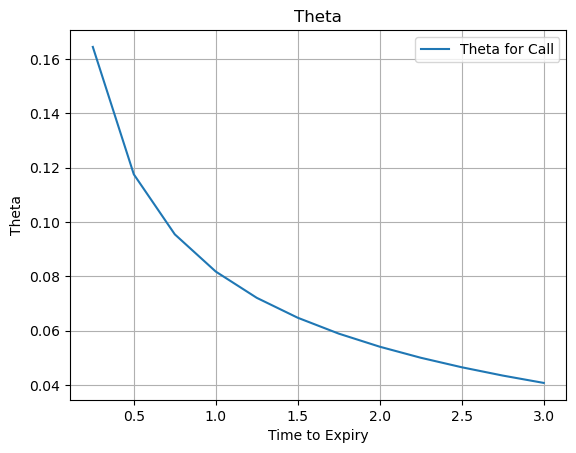

In [51]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])